In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math


In [2]:
df=pd.read_csv("Dhaka Rent.csv",sep=';')
df.head()

#url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/amazon.csv'
#df = pd.read_csv(url)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Data Information


In [3]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [5]:
df.head(7)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000


In [6]:
x=df[['area']]
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [7]:
y=df['rent']
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

Text(0, 0.5, 'RENT')

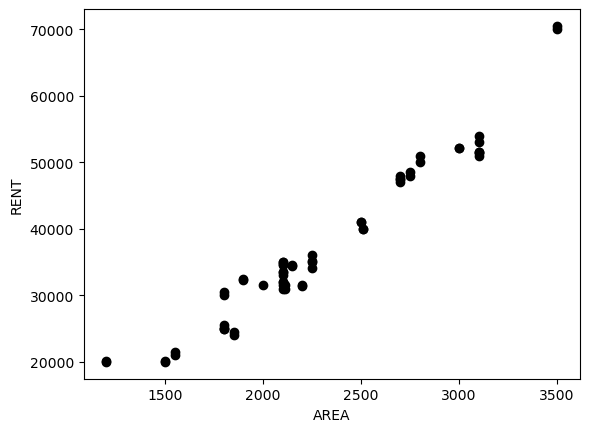

In [8]:
plt.scatter(df.area,df.rent,marker='o',color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')


In [9]:

xtrain,  xtest, ytrain, ytest = tts(x, y)


In [10]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.20, random_state=1)
xtrain.head()

,area
46,1800
3,2250
26,2750
36,1500
21,2100


In [11]:
len(xtrain)

48

In [12]:
len(xtest)

12

In [13]:
xtrain.shape

(48, 1)

In [14]:
xtest.shape

(12, 1)

In [15]:
xtest, xval, ytest, yval = tts(xtest, ytest, test_size=.50, random_state=1)

In [16]:
xval.shape

(6, 1)

In [17]:
xtest.shape

(6, 1)

In [18]:

reg = LinearRegression()

In [19]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [20]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [21]:
reg.coef_

array([21.58641997])

In [22]:
reg.intercept_

-12139.62242780051

In [23]:
reg.predict([[2000]])

array([31033.21751764])

In [24]:
df['predict']=reg.predict(x)
df.head()

,area,rent,predict
0,2000,31500,31033.217518
1,2100,35000,33191.859515
2,2500,41050,41826.427504
3,2250,36100,36429.822511
4,3000,52100,52619.637490


In [25]:
df['residual']=df['rent']-reg.predict(x)
df.head()

,area,rent,predict,residual
0,2000,31500,31033.217518,466.782482
1,2100,35000,33191.859515,1808.140485
2,2500,41050,41826.427504,-776.427504
3,2250,36100,36429.822511,-329.822511
4,3000,52100,52619.637490,-519.637490


Text(0, 0.5, 'RENT')

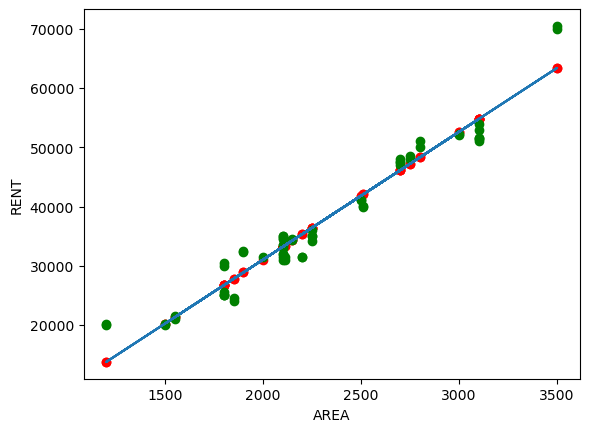

In [26]:
plt.scatter(df.area, df.predict,marker='o',color='red')
plt.scatter(df.area, df.rent,marker='o',color='green')
plt.plot(df.area,df.predict)
plt.xlabel('AREA')
plt.ylabel('RENT')

In [27]:
df['Loss']=df['residual']
df.head()

,area,rent,predict,residual,Loss
0,2000,31500,31033.217518,466.782482,466.782482
1,2100,35000,33191.859515,1808.140485,1808.140485
2,2500,41050,41826.427504,-776.427504,-776.427504
3,2250,36100,36429.822511,-329.822511,-329.822511
4,3000,52100,52619.637490,-519.637490,-519.637490


FIND MSE & MAE

In [28]:
mse=mean_squared_error(df['rent'],df['predict'])
mse

6802725.0548848715

In [29]:
mae=mean_absolute_error(df['rent'],df['predict'])
mae

2012.6409476368394

In [30]:
reg.score(x,y)

0.9500684668312157